# IMPORTING NECESSARY LIBRARIES

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.cluster import KMeans
import tensorflow as tf
%matplotlib inline 

# IMPORT THE DATASET

In [269]:
df=pd.read_csv('/content/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [270]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [272]:
df.shape

(4653, 9)

# Encoding

In [273]:
#Converting cities into numerical columns using get dummies method
new_df = pd.get_dummies(df, columns = ['City','Gender'])
new_df.head()

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male
0,Bachelors,2017,3,34,No,0,0,1,0,0,0,1
1,Bachelors,2013,1,28,No,3,1,0,0,1,1,0
2,Bachelors,2014,3,38,No,2,0,0,1,0,1,0
3,Masters,2016,3,27,No,5,1,1,0,0,0,1
4,Masters,2017,3,24,Yes,2,1,0,0,1,0,1


In [274]:
new_df['Education'].replace(['Bachelors', 'Masters','PHD'], [1, 2, 3], inplace=True)
new_df['EverBenched'].replace(['Yes','No'],[1,0], inplace=True)
new_df.head()

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male
0,1,2017,3,34,0,0,0,1,0,0,0,1
1,1,2013,1,28,0,3,1,0,0,1,1,0
2,1,2014,3,38,0,2,0,0,1,0,1,0
3,2,2016,3,27,0,5,1,1,0,0,0,1
4,2,2017,3,24,1,2,1,0,0,1,0,1


In [275]:
new_df['Education'].value_counts()

1    3601
2     873
3     179
Name: Education, dtype: int64

# Outlier Detection

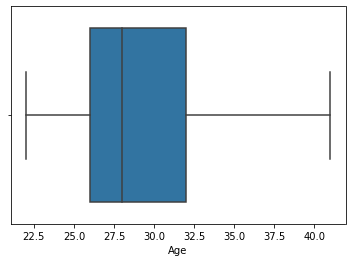

In [276]:
sns.boxplot(x=new_df['Age'])

#Percentage of employees based on gender


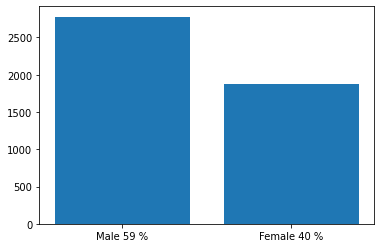

In [277]:
l,a=list(set(df["Gender"])),[]
for i in range(len(l)):
    a.append(list(df["Gender"]).count(l[i]))
    l[i]=l[i]+ " "+ str(int(list(df["Gender"]).count(l[i])*100/len(df["Gender"])))+" %"
plt.bar(l,a)
plt.show()

# Leave or not based on city

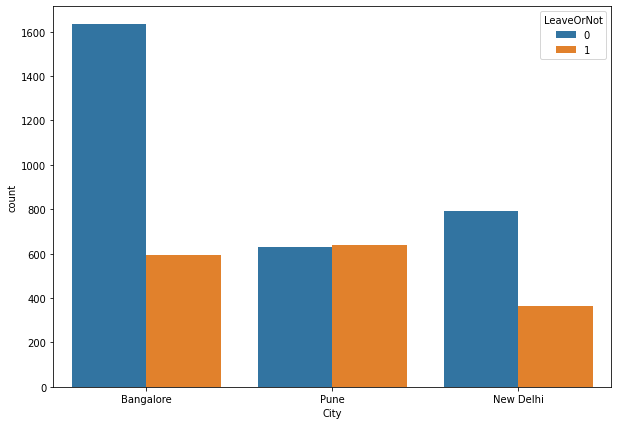

In [278]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(data = df,x='City',hue='LeaveOrNot')
plt.show()
#Most people in bangalore don't leave their job

#Effect of Employees Education in Payment Tiers

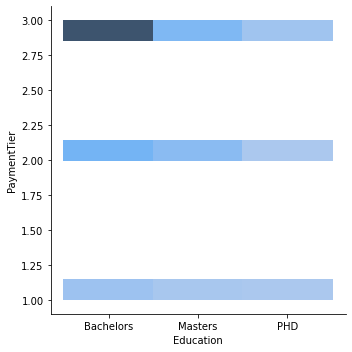

In [279]:
sns.displot(data=df, x="Education", y="PaymentTier")


#Employees education and leave rate

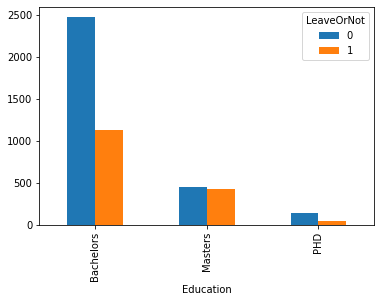

In [280]:
leave_emp=pd.crosstab(index=df['Education'],columns=df['LeaveOrNot'])
leave_emp.plot.bar()

#Employees payment Tier and Leave Rate

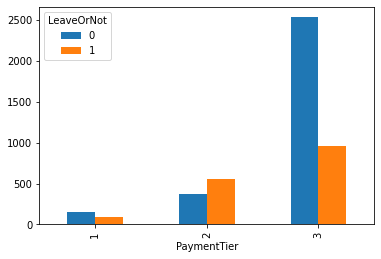

In [281]:
leave_emp=pd.crosstab(index=df['PaymentTier'],columns=df['LeaveOrNot'])
leave_emp.plot.bar()

#Employees Gender and Leave Rate

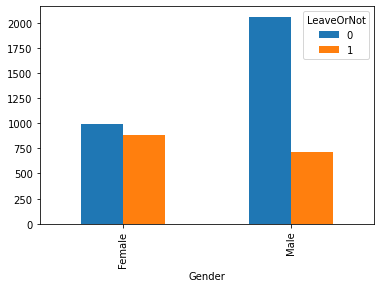

In [282]:
leave_emp=pd.crosstab(index=df['Gender'],columns=df['LeaveOrNot'])
leave_emp.plot.bar()

# Employees joined in each Year

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


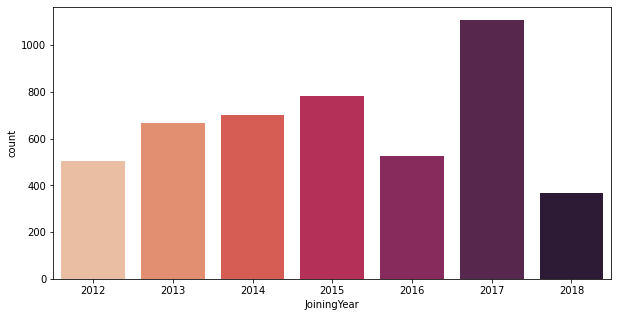

In [283]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(df['JoiningYear'],palette='rocket_r')
#a lot of people joined in 2017

#Employees working in Each Location

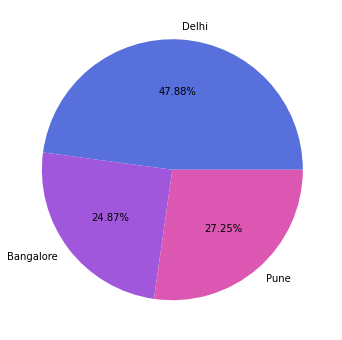

In [284]:
plt.figure(figsize=(6, 6))
classx = ['Delhi','Bangalore','Pune']
colors = sns.color_palette("hls", 8)[5:8]
countx = [len(df[df.City == 'Bangalore']),len(df[df.City == 'New Delhi']),len(df[df.City == 'Pune'])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()#most of the employee are working in delhi

#Count of Experienced People 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


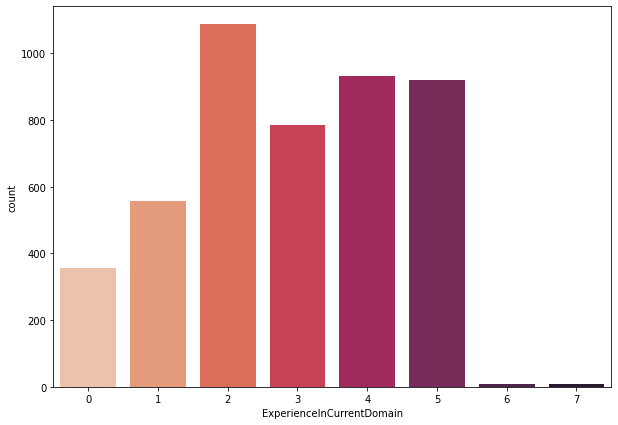

In [285]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(df['ExperienceInCurrentDomain'],palette='rocket_r')
plt.show() #very less employee have experience over 5 years

#Employee Age and Leaving rate



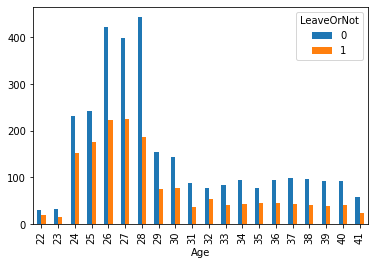

In [286]:
leave_emp=pd.crosstab(index=df['Age'],columns=df['LeaveOrNot'])
leave_emp.plot.bar()#Most people in bangalore don't leave their job

#Benched and Not Benched employees

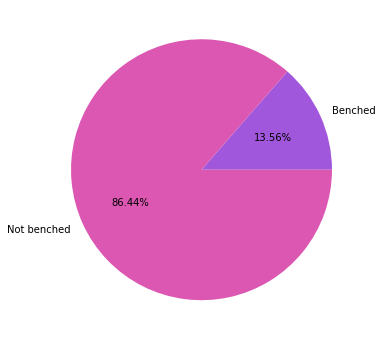

In [287]:
plt.figure(figsize=(6, 6))
classx = ['Benched','Not benched']
colors = sns.color_palette("hls", 8)[6:8]
dfx = df[df.LeaveOrNot == 1]
countx = [len(dfx[dfx.EverBenched == 'Yes']),len(dfx[dfx.EverBenched == 'No'])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()#Very less people who leave the company were benched

#Correlation Matrix

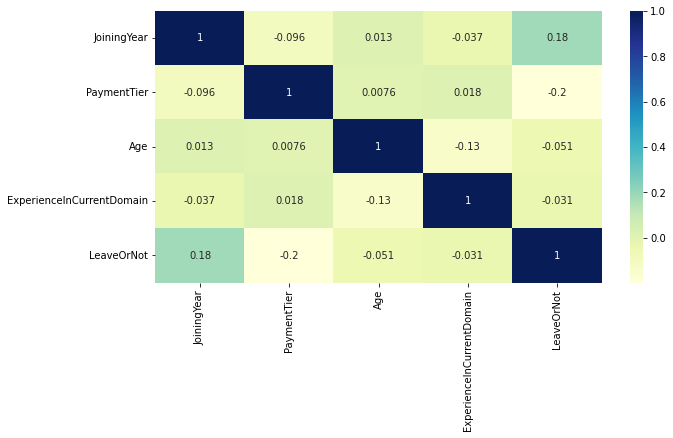

In [288]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot= True,cmap = 'YlGnBu')
plt.show()

# Splitting into Train data and Test data

In [289]:
x= new_df.drop(['LeaveOrNot'], axis=1)
y= new_df['LeaveOrNot']

In [290]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


# Logistic Regression

In [291]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [292]:
log_pred=lr.predict(x_test)

In [293]:
#Classication Report of Logistic Regression
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       619
           1       0.59      0.36      0.45       312

    accuracy                           0.70       931
   macro avg       0.66      0.62      0.62       931
weighted avg       0.68      0.70      0.68       931



In [294]:
#accuracy
log_acc=accuracy_score(y_test, log_pred)
log_acc

0.7013963480128894

In [295]:
#confusion matrix
log_cm = confusion_matrix(y_test, log_pred)
log_cm

array([[540,  79],
       [199, 113]])

# Gaussian Naive Bayes Classifier

In [296]:
gauss=GaussianNB()
gauss.fit(x_train,y_train)
gauss_pred=gauss.predict(x_test)
print(classification_report(y_test, gauss_pred))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78       619
           1       0.56      0.51      0.53       312

    accuracy                           0.70       931
   macro avg       0.66      0.65      0.66       931
weighted avg       0.70      0.70      0.70       931



In [297]:
#accuracy
gauss_acc=accuracy_score(y_test, gauss_pred)
gauss_acc

0.7024704618689581

In [298]:
#confusion matrix
gauss_cm = confusion_matrix(y_test, gauss_pred)
gauss_cm

array([[496, 123],
       [154, 158]])

# Bernoulli Naive Bayes Classifier

In [299]:
ber=BernoulliNB()
ber.fit(x_train,y_train)
ber_pred=ber.predict(x_test)
print(classification_report(y_test, ber_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       619
           1       0.52      0.43      0.47       312

    accuracy                           0.68       931
   macro avg       0.63      0.62      0.62       931
weighted avg       0.66      0.68      0.67       931



In [300]:
#accuracy
ber_acc=accuracy_score(y_test, ber_pred)
ber_acc

0.677765843179377

In [301]:
#confusion matrix
ber_cm = confusion_matrix(y_test, ber_pred)
ber_cm

array([[497, 122],
       [178, 134]])

# Multinomial Naive Bayes Classifier

In [302]:
mul=MultinomialNB()
mul.fit(x_train,y_train)
mul_pred=mul.predict(x_test)
print(classification_report(y_test, mul_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       619
           1       0.70      0.33      0.45       312

    accuracy                           0.73       931
   macro avg       0.72      0.63      0.63       931
weighted avg       0.72      0.73      0.69       931



In [303]:
#accuracy
mul_acc=accuracy_score(y_test, mul_pred)
mul_acc

0.7271750805585392

In [304]:
#confusion matrix
mul_cm = confusion_matrix(y_test, mul_pred)
mul_cm

array([[575,  44],
       [210, 102]])

# Decision tree

In [305]:
deci=DecisionTreeClassifier()
deci.fit(x_train,y_train)
deci_pred=deci.predict(x_test)
print(classification_report(y_test, deci_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       619
           1       0.74      0.68      0.71       312

    accuracy                           0.81       931
   macro avg       0.79      0.78      0.79       931
weighted avg       0.81      0.81      0.81       931



In [306]:
#accuracy
deci_acc=accuracy_score(y_test, deci_pred)
deci_acc

0.8131041890440387

In [307]:
#confusion matrix
deci_cm = confusion_matrix(y_test, deci_pred)
deci_cm

array([[544,  75],
       [ 99, 213]])

# Random Forest Classifier

In [308]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       619
           1       0.77      0.68      0.72       312

    accuracy                           0.82       931
   macro avg       0.81      0.79      0.80       931
weighted avg       0.82      0.82      0.82       931



In [309]:
#accuracy
rf_acc=accuracy_score(y_test, rf_pred)
rf_acc

0.8249194414607949

In [310]:
#confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

array([[556,  63],
       [100, 212]])

# Support Vector Machine

In [311]:
svm=SVC(kernel='linear', random_state=0)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       619
           1       0.63      0.38      0.47       312

    accuracy                           0.72       931
   macro avg       0.68      0.63      0.64       931
weighted avg       0.70      0.72      0.69       931



In [312]:
#accuracy
svm_acc=accuracy_score(y_test, svm_pred)
svm_acc

0.7164339419978518

In [313]:
#confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm

array([[549,  70],
       [194, 118]])

# K-Nearest Neighbor Classifier

In [314]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       619
           1       0.70      0.53      0.60       312

    accuracy                           0.77       931
   macro avg       0.75      0.71      0.72       931
weighted avg       0.76      0.77      0.76       931



In [315]:
#accuracy
knn_acc=accuracy_score(y_test, knn_pred)
knn_acc

0.7669172932330827

In [316]:
#confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

array([[548,  71],
       [146, 166]])

# K-Means Clustering

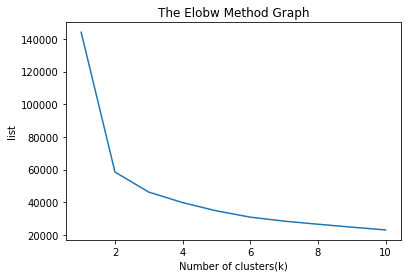

In [317]:
l= []  #Initializing the list for the value
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    l.append(kmeans.inertia_)  
plt.plot(range(1, 11), l)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('list')  
plt.show()

In [318]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 4)  
kmeans_pred= kmeans.fit_predict(x_train)
kmeans.fit(x_train,y_train)
kmeans_pred=kmeans.predict(x_test)
print(classification_report(y_test, kmeans_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       619
           1       0.35      0.29      0.32       312

    accuracy                           0.59       931
   macro avg       0.51      0.51      0.51       931
weighted avg       0.57      0.59      0.57       931



In [319]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(x)
 
print(label)

[0 1 0 ... 1 1 0]


In [320]:
#accuracy
kmeans_acc=accuracy_score(y_test, kmeans_pred)
kmeans_acc

0.5853920515574651

In [321]:
#confusion matrix
kmeans_cm = confusion_matrix(y_test, kmeans_pred)
kmeans_cm

array([[455, 164],
       [222,  90]])

# STOCHASTIC GRADIENR DESCENT

In [322]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(x_train,y_train)
sgd_pred=clf.predict(x_test)
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       619
           1       0.00      0.00      0.00       312

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.44      0.66      0.53       931



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
#accuracy
sgd_acc=accuracy_score(y_test, sgd_pred)
sgd_acc

0.664876476906552

In [324]:
#confusion matrix
sgd_cm = confusion_matrix(y_test, sgd_pred)
sgd_cm

array([[619,   0],
       [312,   0]])

#GRADIENT BOOSTING

In [325]:
gdc_clf = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth = 4, random_state = 42) 
gdc_clf.fit(x_train, y_train)
gbc_pred = gdc_clf.predict(x_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       619
           1       0.84      0.66      0.74       312

    accuracy                           0.85       931
   macro avg       0.84      0.80      0.82       931
weighted avg       0.85      0.85      0.84       931



In [326]:
gbc_acc=accuracy_score(y_test,gbc_pred)
gbc_acc

0.8453276047261009

In [327]:
gbc_cm = confusion_matrix(y_test, gbc_pred)
gbc_cm

array([[581,  38],
       [106, 206]])

#Artificial Neural Networks

In [328]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [329]:
ann = tf.keras.models.Sequential()
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#output layer
#as target value is binary we use sigmoid
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [330]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
117/117 [==============================] - 1s 2ms/step - loss: 0.6700 - accuracy: 0.6429
Epoch 2/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6824
Epoch 3/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7123
Epoch 4/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7238
Epoch 5/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7308
Epoch 6/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7389
Epoch 7/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7423
Epoch 8/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7458
Epoch 9/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7496
Epoch 10/50
117/117 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7550

In [331]:
ann_pred = ann.predict(X_test)


30/30 [==============================] - 0s 1ms/step


In [332]:
ann_pred = (ann_pred > 0.5)

In [333]:
ann_acc=accuracy_score(ann_pred,y_test)
ann_acc

0.8120300751879699

#COMPARISION GRAPH OF VARIOUS MODELS

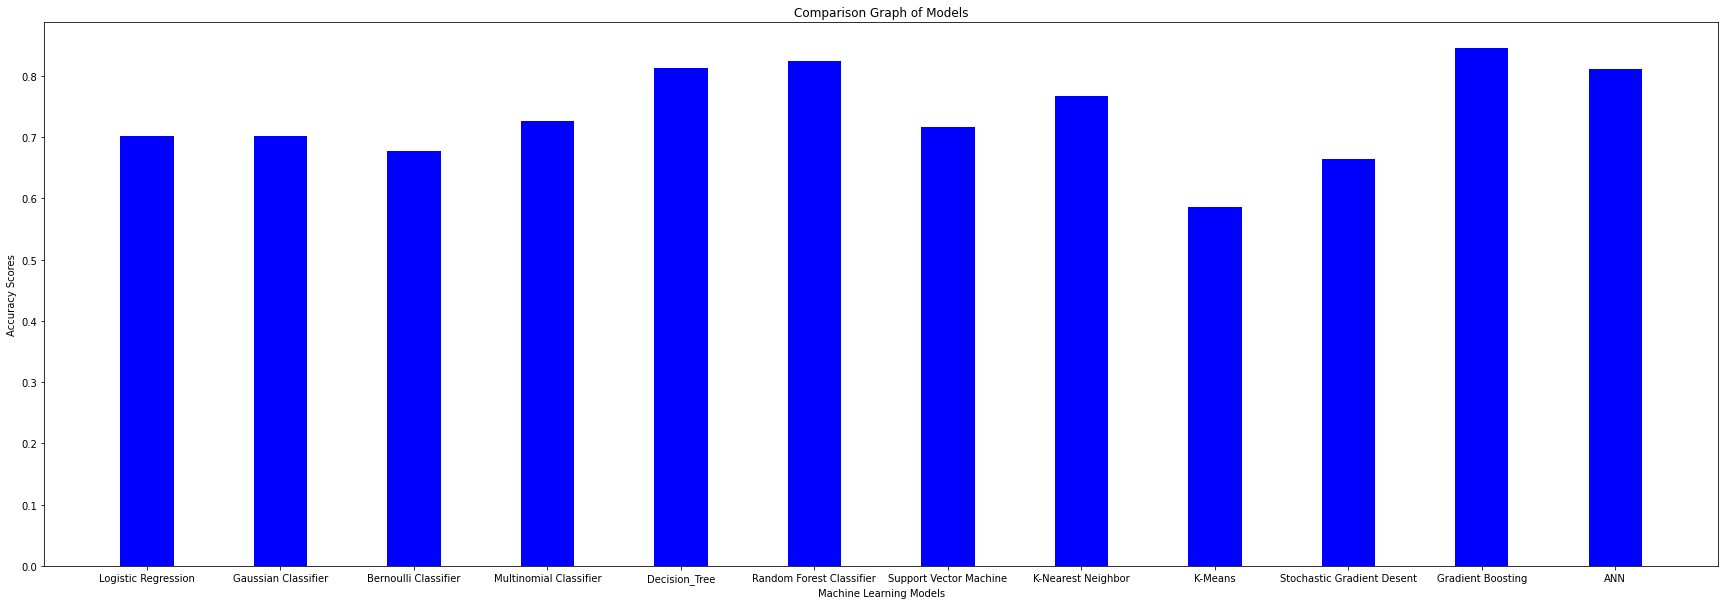

In [334]:
data = {'Logistic Regression':log_acc, 'Gaussian Classifier':gauss_acc, 'Bernoulli Classifier':ber_acc,'Multinomial Classifier':mul_acc,'Decision_Tree':deci_acc,'Random Forest Classifier':rf_acc,'Support Vector Machine':svm_acc,'K-Nearest Neighbor':knn_acc,'K-Means':kmeans_acc,'Stochastic Gradient Desent':sgd_acc,'Gradient Boosting':gbc_acc,'ANN':ann_acc}
Models = list(data.keys())
Accuracy = list(data.values())

fig = plt.figure(figsize = (30, 10))

plt.bar(Models, Accuracy, color ='blue',width = 0.4)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.title("Comparison Graph of Models")
plt.show()

#From the above comparitive analysis it is inferred that Gradient Boosting Classifier gives the best accuracy